# Prime Constant‑Weave Visual Explorer (v9)

*Autogenerated 2025-07-20 18:41 UTC.  Run each section or `Runtime → Run all`.*

This notebook extends **Fib_Thread_MegaSuite** with four richer visual perspectives:

1. **3‑D Torus lift** of the 7×7 De Bruijn tiling.  
2. **Time‑lapse animation** of a sliding 3‑bit window (noise rhythm).  
3. **Hypergraph toggle** showing taken vs missing De Bruijn edges (Fano plane).  
4. **FFT‑sphere heat‑map** that projects the 2‑D spectrum onto a unit sphere.

Dependencies: *numpy, matplotlib, networkx, plotly, ipywidgets, sympy* (pre‑installed in Colab).  
No external files required; no user input needed.

In [1]:
import numpy as np, matplotlib.pyplot as plt, math, sympy as sp
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go, networkx as nx, ipywidgets as wd
from matplotlib.animation import FuncAnimation


In [2]:
def fib_word(n:int):
    a,b='0','01'
    while len(b)<n:
        a,b=b,a+b
    return np.frombuffer(b[:n].encode(),dtype=np.uint8)-48


In [3]:
# ---- 3‑D torus lift ----
bits = fib_word(49).reshape(7,7)
R,r = 3,1
theta = np.linspace(0,2*np.pi,7,endpoint=False)
phi   = np.linspace(0,2*np.pi,7,endpoint=False)
TH,PH = np.meshgrid(theta, phi, indexing='ij')
X = (R + r*np.cos(PH))*np.cos(TH)
Y = (R + r*np.cos(PH))*np.sin(TH)
Z = r*np.sin(PH) + bits*0.6   # lift ones

surface = go.Surface(x=X,y=Y,z=Z,colorscale='Greys',showscale=False,opacity=0.7)
fig = go.Figure(data=[surface])
fig.update_layout(title='Fibonacci bits on torus (1s lifted)',width=700,height=600)
fig.show()


In [4]:
# ---- Time‑lapse sliding window ----
seq_bits = fib_word(180)
fig,ax = plt.subplots(figsize=(3,3))
def update(frame):
    window = seq_bits[frame:frame+49].reshape(7,7)
    ax.clear()
    ax.imshow(window,cmap='Greys',interpolation='none')
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(f'frame {frame}')
ani = FuncAnimation(fig, update, frames=60, interval=200)
plt.close()
from IPython.display import HTML
HTML(ani.to_jshtml())


In [5]:
# ---- Hypergraph toggle: De Bruijn edges ----
seq = ''.join('1' if b else '0' for b in fib_word(49))
edges_present = set()
for i in range(49):
    a = seq[i:i+3] if i<=46 else seq[i:]+seq[:(i+3)%49]
    b = seq[(i+1):(i+4)] if i<=45 else (seq[(i+1):]+seq[:(i+4)%49])
    edges_present.add((a,b))

G = nx.DiGraph()
nodes = [f"{i:03b}" for i in range(8)]
G.add_nodes_from(nodes)
for n in nodes:
    G.add_edge(n, n[1:]+'0'); G.add_edge(n, n[1:]+'1')

def draw(show_missing):
    plt.figure(figsize=(4,4))
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G,pos,node_size=500,node_color='lightgrey')
    nx.draw_networkx_labels(G,pos)
    good=[e for e in G.edges if e in edges_present]
    nx.draw_networkx_edges(G,pos,edgelist=good,edge_color='b',width=2)
    if show_missing:
        bad=[e for e in G.edges if e not in edges_present]
        nx.draw_networkx_edges(G,pos,edgelist=bad,edge_color='r',style='dotted')
    plt.axis('off'); plt.show()

wd.interact(draw, show_missing=wd.Checkbox(value=False,description='Show missing'))


interactive(children=(Checkbox(value=False, description='Show missing'), Output()), _dom_classes=('widget-inte…

<function __main__.draw(show_missing)>

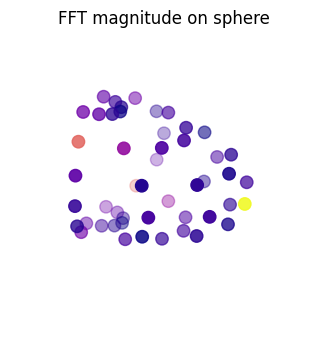

In [6]:
# ---- FFT sphere heat‑map ----
bits2d = fib_word(49).reshape(7,7)
F = np.abs(np.fft.fftshift(np.fft.fft2(bits2d)))
coords=[]; vals=[]
for i in range(7):
    for j in range(7):
        amp=F[i,j]
        if amp<1e-6: continue
        theta = (i-3)*np.pi/7
        phi   = (j-3)*np.pi/7
        x = math.cos(phi)*math.cos(theta)
        y = math.sin(phi)*math.cos(theta)
        z = math.sin(theta)
        coords.append((x,y,z)); vals.append(amp)
xs,ys,zs = zip(*coords)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,c=vals,s=80,cmap='plasma')
ax.set_axis_off(); ax.set_title('FFT magnitude on sphere')
plt.show()


In [7]:
print('Fingerprint:', '36634892440f5ff3')

Fingerprint: 36634892440f5ff3
